【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[
1.0
0.8
0.8
1.0
]

多次元の正規分布による乱数はnp.random.multivariate_normal()を使うことで作成できます。

《シード値について》


実行ごとに値が変わらないように、np.random.seed()により乱数のシード値を固定しておきましょう。今回シード値は0を使うことにします。

In [20]:
import numpy as np
from scipy.stats import multivariate_normal
np.random.seed(0)

# 期待値と分散共分散行列の準備
mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]])

# numpy を用いた生成
data_1 = np.random.multivariate_normal(mean, cov, size=500)

print(data_1[0])
# データ型の確認
print(data_1.shape)


# 期待値の確認
print(np.mean(data_1, axis=0))


# 分散共分散の確認
print(np.cov(data_1, rowvar=False))


# scipyで生成する方法
data_2 = multivariate_normal(mean, cov).rvs(size=500)

# データ型の確認
print(data_2.shape)


# 期待値の確認
print(np.mean(data_2, axis=0))


# 分散共分散の確認
print(np.cov(data_2, rowvar=False))


[-4.80006782 -1.54698618]
(500, 2)
[-2.93003625  0.05405893]
[[0.94877101 0.75453518]
 [0.75453518 0.96104806]]
(500, 2)
[-3.02245828 -0.01908023]
[[0.93647233 0.76132357]
 [0.76132357 0.95782874]]


【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。


散布図はmatplotlibのplt.scatter()を使うことで描けます。


matplotlib.pyplot.scatter — Matplotlib 3.1.1 documentation



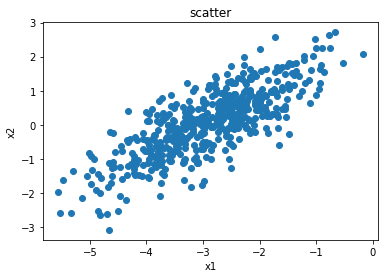

In [67]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]]) # 共分散行列を指定。２つの0.8のところを好きなrの値に変えればxとyの共分散の値を変えられる。

x, y = np.random.multivariate_normal(mean, cov, 500).T # 500個生成。
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("scatter")
# 散布図を描画
plt.scatter(x, y)


【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。


ヒストグラムはplt.hist()を使うことで描けます。


matplotlib.pyplot.hist — Matplotlib 3.1.1 documentation


各次元ごとに作成し、2つのヒストグラムとしてください。


それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。


matplotlib.pyplot.xlim — Matplotlib 3.1.1 documentation

(array([  7.,   7.,  24.,  63.,  91., 125., 100.,  52.,  23.,   8.]),
 array([-3.07908535, -2.49973208, -1.92037881, -1.34102554, -0.76167227,
        -0.182319  ,  0.39703427,  0.97638754,  1.55574082,  2.13509409,
         2.71444736]),
 <a list of 10 Patch objects>)

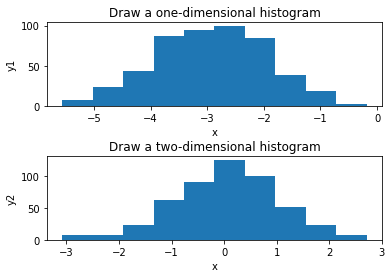

In [55]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

mean = np.array([-3, 0])
cov = np.array([[1.0, 0.8], [0.8, 1.0]]) # 共分散行列を指定。２つの0.8のところを好きなrの値に変えればxとyの共分散の値を変えられる。

y1, y2 = np.random.multivariate_normal(mean, cov, 500).T # 500個生成。
x = plt.xlim(-6,6)

# plt.figure(figsize=(5,4))
# 余白を設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)

#１次元のヒストグラフを描画
plt.subplot(2,1,1)
plt.xlabel("x")
plt.ylabel("y1")
plt.title("Draw a one-dimensional histogram")
plt.hist(y1)
 
#2次元のヒストグラフを描画
plt.subplot(2,1,2)
plt.xlabel("x")
plt.ylabel("y2")
plt.title("Draw a two-dimensional histogram")
plt.hist(y2)


【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。


[
1.0
0.8
0.8
1.0
]

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。凡例として問題1のものは0、問題4のものは1を表示してください。

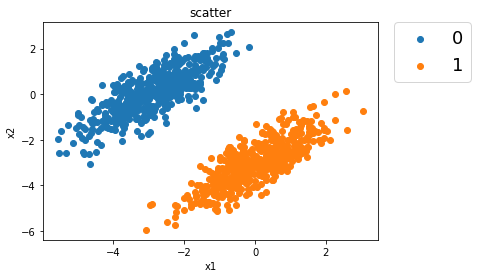

In [59]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

mean1 = np.array([-3, 0])
cov1 = np.array([[1.0, 0.8], [0.8, 1.0]]) # 共分散行列を指定。２つの0.8のところを好きなrの値に変えればxとyの共分散の値を変えられる。

x1, y1 = np.random.multivariate_normal(mean1, cov1, 500).T # 500個生成。
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("scatter")
# 散布図を描画
plt.scatter(x1, y1, label="0")

mean2 = np.array([0, -3])
cov2 = np.array([[1.0, 0.8], [0.8, 1.0]]) # 共分散行列を指定。２つの0.8のところを好きなrの値に変えればxとyの共分散の値を変えられる。

x2, y2 = np.random.multivariate_normal(mean2, cov2, 500).T # 500個生成。
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("scatter")
# 散布図を描画
plt.scatter(x2, y2, label="1")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [65]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

mean1 = np.array([-3, 0])
cov1 = np.array([[1.0, 0.8], [0.8, 1.0]]) # 共分散行列を指定。２つの0.8のところを好きなrの値に変えればxとyの共分散の値を変えられる。

# data1 = np.random.multivariate_normal(mean1, cov1, 500).T # 500個生成。
data1 = np.random.multivariate_normal(mean1, cov1, 500) # 500個生成。


mean2 = np.array([0, -3])
cov2 = np.array([[1.0, 0.8], [0.8, 1.0]]) # 共分散行列を指定。２つの0.8のところを好きなrの値に変えればxとyの共分散の値を変えられる。

# data2 = np.random.multivariate_normal(mean2, cov2, 500).T # 500個生成。
data2 = np.random.multivariate_normal(mean2, cov2, 500) # 500個生成。

print(data1.shape)
print(data2.shape)
y3 = np.concatenate([data1,data2])
print(y3.shape)

(500, 2)
(500, 2)
(1000, 2)


【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。問題1のものには0、問題4のものには1を対応させます。


0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。


機械学習に使用するデータセットはこのような形になっていることが多いです。


《作成例》


データが3個+3個の場合は以下のような(6, 3)のndarrayになります。



In [80]:
import numpy as np
import pandas as pd
# print(data1)
# print(np.insert(data1, 2, 0, axis=1))
# print(np.insert(data2, 2, 1, axis=1))
np.insert(data1, 2, 0, axis=1)
np.insert(data2, 2, 1, axis=1)
y4 = np.concatenate([np.insert(data1, 2, 0, axis=1),np.insert(data2, 2, 1, axis=1)])
print(y4)
print(y4.shape)

[[-4.80006782 -1.54698618  0.        ]
 [-4.63714503 -0.21987973  0.        ]
 [-4.46267867 -2.08076347  0.        ]
 ...
 [-0.2185878  -3.15676476  1.        ]
 [-1.37970304 -4.27950068  1.        ]
 [ 1.49786804 -2.33126243  1.        ]]
(1000, 3)
